In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\HP\AppData\Local\Temp/ipykernel_13128/950759743.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df=pd.read_csv('gold_price_data.csv',index_col=0,parse_dates=True)
df.head()

,Value
Date,
1970-01-01,35.2
1970-01-04,35.1
1970-01-07,35.4
1970-01-10,36.2
1971-01-01,37.4


In [3]:
df.columns

Index(['Value'], dtype='object')

<AxesSubplot:xlabel='Date'>

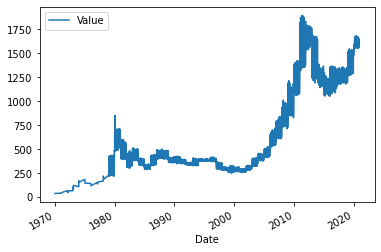

In [4]:
df.plot()

In [5]:
df.isna().sum()

Value    0
dtype: int64

In [6]:
timeSeries = df.copy()

array([[<AxesSubplot:title={'center':'Value'}>]], dtype=object)

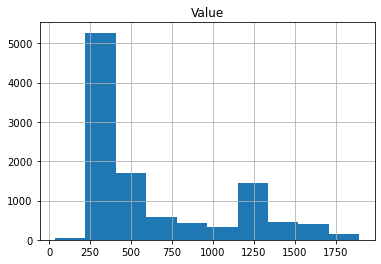

In [7]:
timeSeries.hist()

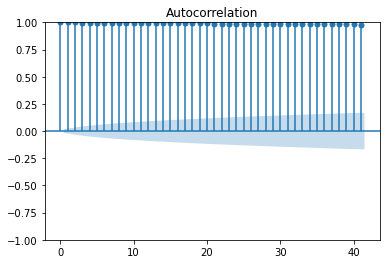

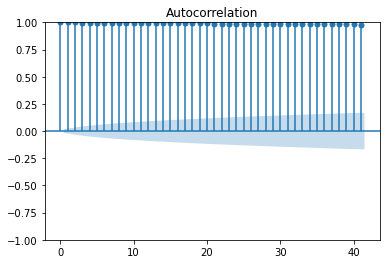

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(timeSeries)

In [9]:
timeSeries.shape

(10787, 1)

In [10]:
data1 = timeSeries[0:5394]
data2 = timeSeries[5394:]

In [11]:
data1.size
data2.size

5393

In [12]:
data1.mean()

Value    381.351481
dtype: float64

In [13]:
data2.mean()

Value    925.892268
dtype: float64

In [14]:
data1.var()

Value    6167.576533
dtype: float64

In [15]:
data2.var()

Value    222363.129839
dtype: float64

In [16]:
timeSeries.values

array([[  35.2 ],
       [  35.1 ],
       [  35.4 ],
       ...,
       [1653.75],
       [1570.7 ],
       [1562.8 ]])

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(timeSeries['Value'])

In [19]:
def adfuller_test(Value):
    result=adfuller(Value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if test_result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary ")

adfuller_test(timeSeries['Value'])

Data is non-stationary 
ADF Test Statistic : -0.07112124453813365
p-value : 0.9522400769147396
#Lags Used : 39
Number of Observations : 10747


In [20]:
timeSeries['First Difference'] = timeSeries.diff().dropna()

In [21]:
timeSeries['First Difference'] = timeSeries['Value'] - timeSeries['Value'].shift(1)

In [22]:
timeSeries['Seasonal First Difference']=timeSeries['Value']-timeSeries['Value'].shift(12)

In [23]:
timeSeries.head(20)

,Value,First Difference,Seasonal First Difference
Date,,,
1970-01-01,35.2,NaN,NaN
1970-01-04,35.1,-0.1,NaN
1970-01-07,35.4,0.3,NaN
1970-01-10,36.2,0.8,NaN
1971-01-01,37.4,1.2,NaN
1971-01-04,38.9,1.5,NaN
1971-01-07,40.1,1.2,NaN
1971-01-10,42.0,1.9,NaN
1972-03-01,43.5,1.5,NaN


In [24]:
adfuller_test(timeSeries['Seasonal First Difference'].dropna())

ADF Test Statistic : -14.980483866744715
p-value : 1.1640981457203492e-27
#Lags Used : 39
Number of Observations : 10735


In [25]:
adfuller_test(timeSeries['First Difference'].dropna())

ADF Test Statistic : -17.568807521617266
p-value : 4.061374360447349e-30
#Lags Used : 38
Number of Observations : 10747


<AxesSubplot:xlabel='Date'>

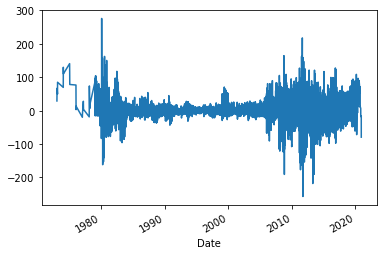

In [26]:
timeSeries['Seasonal First Difference'].plot()

<AxesSubplot:xlabel='Date'>

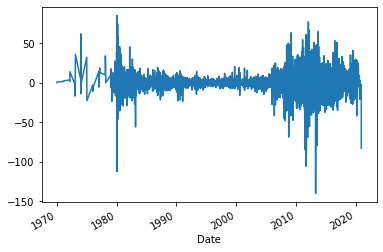

In [27]:
timeSeries['First Difference'].plot()

In [28]:
timeSeries.shape
# train = X[0:9999] # 40 data as train data
# test = X[9999:]  # 9 data as test data
# predictions = []

(10787, 3)

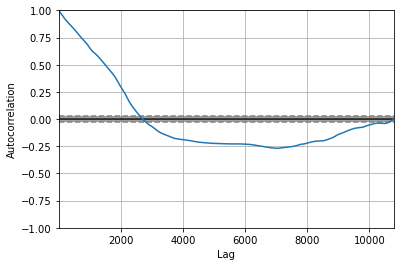

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(timeSeries['Value'])
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


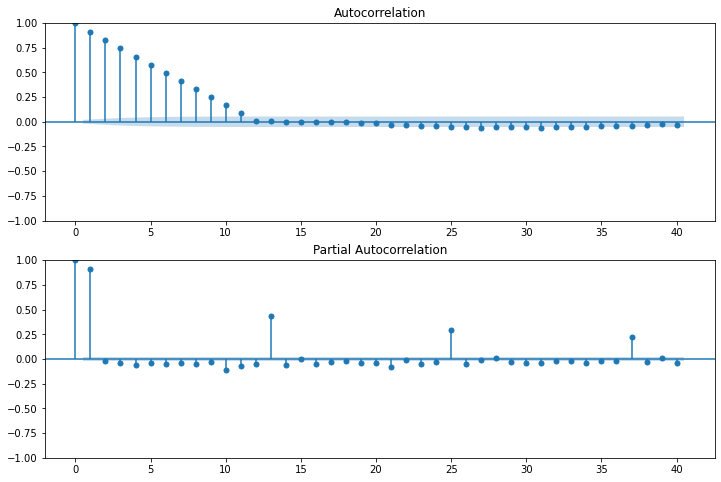

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(timeSeries['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(timeSeries['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(timeSeries['Value'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=78048.396, Time=32.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78090.196, Time=0.77 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78090.620, Time=1.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=78090.554, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78090.847, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=78081.191, Time=15.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78081.126, Time=14.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=78049.953, Time=33.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=78084.745, Time=23.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=78088.281, Time=16.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=78082.704, Time=21.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78082.775, Time=17.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=78086.029, Time=46.21 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=78049.141, Time=10.01 sec

Best mod

In [35]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(timeSeries['Value'], order=(1,1,1))
model_fit=model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                10787
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -39041.451
Date:                Sun, 22 May 2022   AIC                          78088.902
Time:                        15:26:16   BIC                          78110.760
Sample:                             0   HQIC                         78096.273
                              - 10787                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8731      0.046    -18.972      0.000      -0.963      -0.783
ma.L1          0.8846      0.044     19.969      0.000       0.798       0.971
sigma2        81.5622      0.334    244.195      0.000      80.908      82.217
===================================================================================
Ljung-Box (L1) (Q):                   5.61   Jarque-Bera (JB):            207897.06
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

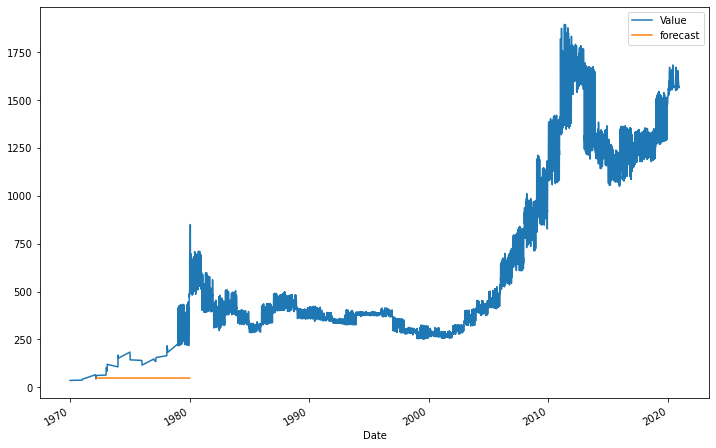

In [37]:
timeSeries['forecast']=model_fit.predict(start=10,end=300,dynamic=True)
timeSeries[['Value','forecast']].plot(figsize=(12,8))

In [47]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(2, 1, 2),seasonal_order=(1,1,1,12))
results=model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maxim

<AxesSubplot:xlabel='Date'>

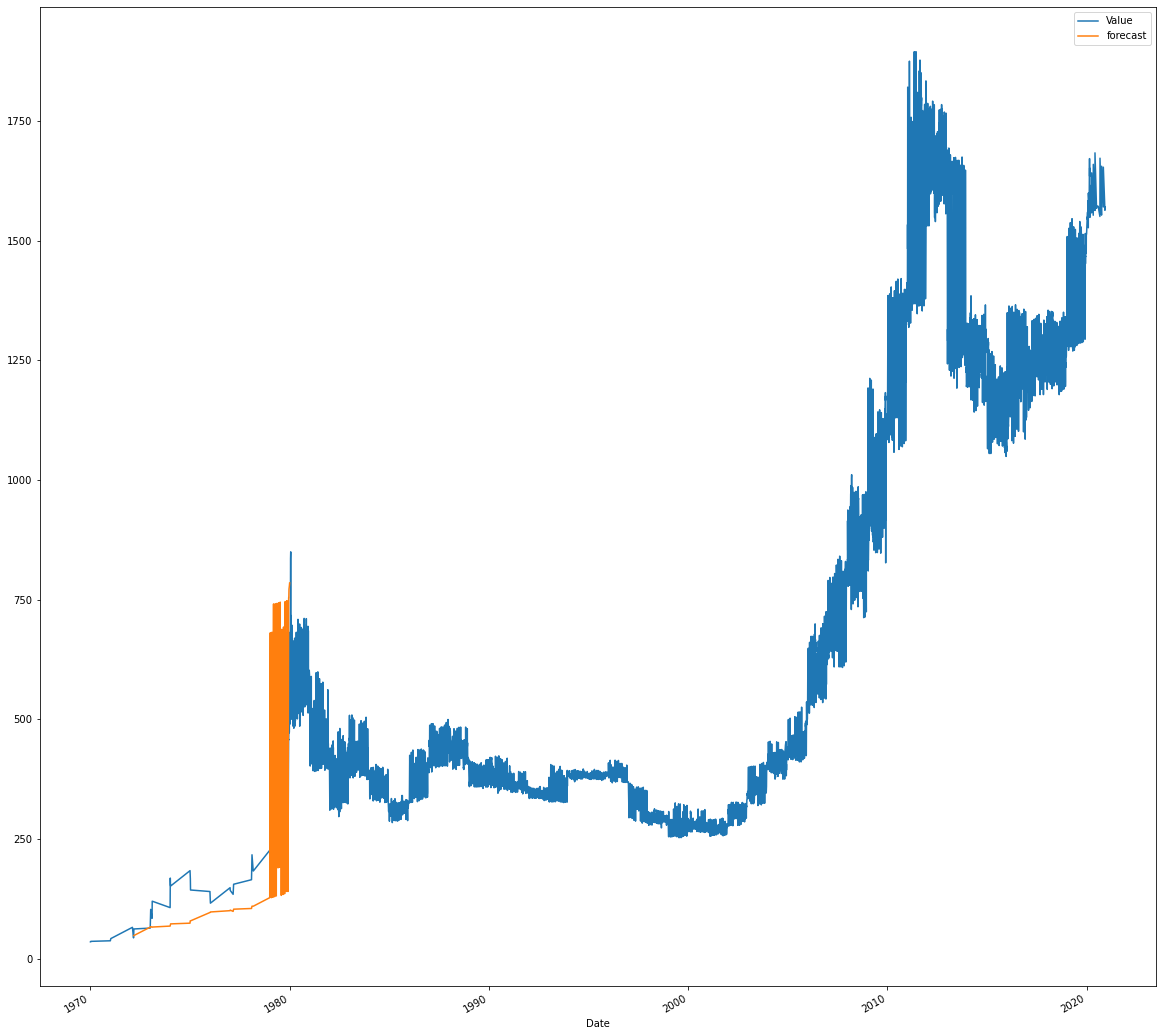

In [48]:
df['forecast']=results.predict(start=10,end=300,dynamic=True)
df[['Value','forecast']].plot(figsize=(20,20))

In [42]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [43]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [44]:
future_timeSeries=pd.concat([df,future_datest_df])

In [45]:
future_timeSeries['forecast'] = results.predict(start = 10000, end = 11000, dynamic= True)  

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [46]:
future_timeSeries['forecast']

1970-01-01   NaN
1970-01-04   NaN
1970-01-07   NaN
1970-01-10   NaN
1971-01-01   NaN
              ..
2021-10-13   NaN
2021-11-13   NaN
2021-12-13   NaN
2022-01-13   NaN
2022-02-13   NaN
Name: forecast, Length: 10810, dtype: float64

In [50]:
predictions= results.forecast(steps=100)[0]
predictions

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


KeyError: 0

In [51]:
df['Value','forecast']

KeyError: ('Value', 'forecast')

In [53]:
df['forecast'].head()


Date
1970-01-01   NaN
1970-01-04   NaN
1970-01-07   NaN
1970-01-10   NaN
1971-01-01   NaN
Name: forecast, dtype: float64